In [3]:
import open3d as o3d
import numpy as np
import cv2, PIL
from PIL import Image
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import argparse
import imutils
import sys
%matplotlib nbagg

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Depth Image to Point Cloud Visualization with Open3d

In [4]:
class AzureKinect:
    def __init__(self):
        self.config = o3d.io.AzureKinectSensorConfig()
        self.device = 0
        self.align_depth_to_color = 1

    def start(self):
        self.sensor = o3d.io.AzureKinectSensor(self.config)
        if not self.sensor.connect(self.device):
            raise RuntimeError('Failed to connect to sensor')

    def frames(self):
            while 1:
                rgbd = self.sensor.capture_frame(self.align_depth_to_color)
                if rgbd is None:
                    continue
                color,depth = np.asarray(rgbd.color).astype(np.uint8),np.asarray(rgbd.depth).astype(np.float32) / 1000.0
                return color, depth

In [5]:
cam = AzureKinect()
cam.start()

[Open3D INFO] AzureKinectSensor::Connect
[Open3D INFO] sensor_index 0
[Open3D INFO] Serial number: 000276693112
[Open3D INFO] Firmware build: Rel
[Open3D INFO] > Color: 1.6.102
[Open3D INFO] > Depth: 1.6.75[6109.7]


In [235]:

color, depth = cam.frames()
intrinsic = o3d.camera.PinholeCameraIntrinsic(1280, 720, 601.1693115234375, 600.85931396484375, 637.83624267578125, 363.8018798828125)
depth = o3d.geometry.Image(depth)
img = o3d.geometry.Image(color)
rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(img, depth, depth_scale=1.0, convert_rgb_to_intensity=False)
#pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, intrinsic)
#o3d.visualization.draw_geometries([pcd])

[Open3D INFO] AzureKinectSensor::Connect
[Open3D INFO] sensor_index 0
[Open3D INFO] Serial number: 000276693112
[Open3D INFO] Firmware build: Rel
[Open3D INFO] > Color: 1.6.102
[Open3D INFO] > Depth: 1.6.75[6109.7]


<IPython.core.display.Javascript object>


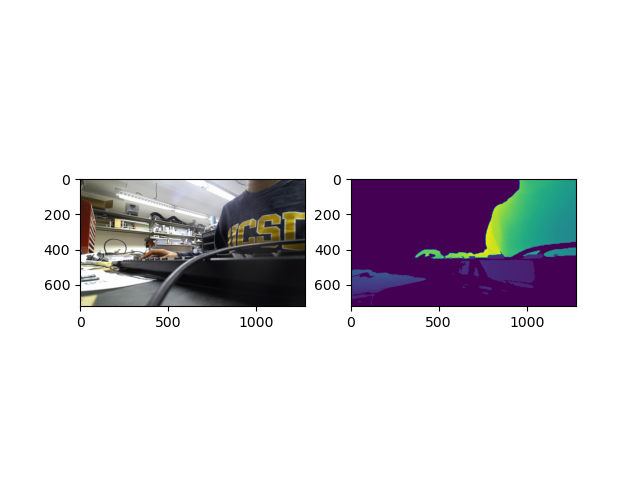

In [236]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(rgbd.color)
fig.add_subplot(1, 2, 2)
plt.imshow(rgbd.depth)
plt.show()

In [224]:
color_array = np.asarray(rgbd.color)
depth_array = np.asarray(rgbd.depth)
color_img = Image.fromarray(color_array)
depth_img = Image.fromarray(depth_array)
color_img.save("color.jpg")

### Aruco Marker Detection with OpenCV

Generate the Aruco marker dictionary

<IPython.core.display.Javascript object>


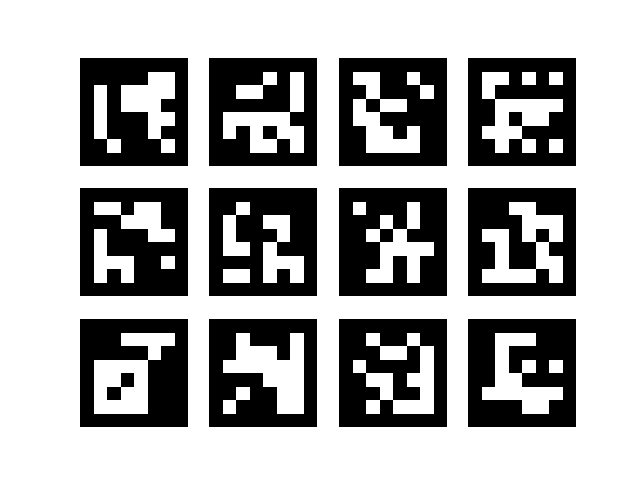

In [225]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 300)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("./markers.pdf")
plt.show()

In [226]:
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [227]:
# load the input image from disk and resize it
print("[INFO] loading image...")
image = cv2.imread("./color.jpg")
image = imutils.resize(image, width=600)
# loop over the types of ArUco dictionaries
for (arucoName, arucoDict) in ARUCO_DICT.items():
    # load the ArUCo dictionary, grab the ArUCo parameters, and
    # attempt to detect the markers for the current dictionary
    arucoDict = cv2.aruco.Dictionary_get(arucoDict)
    arucoParams = cv2.aruco.DetectorParameters_create()
    (corners, ids, rejected) = cv2.aruco.detectMarkers(
        image, arucoDict, parameters=arucoParams)
    # if at least one ArUco marker was detected display the ArUco
    # name to our terminal
    if len(corners) > 0:
        print("[INFO] detected {} markers for '{}'".format(
            len(corners), arucoName))


[INFO] loading image...
[INFO] detected 1 markers for 'DICT_6X6_100'
[INFO] detected 1 markers for 'DICT_6X6_250'
[INFO] detected 1 markers for 'DICT_6X6_1000'


Print and take a picture

<IPython.core.display.Javascript object>


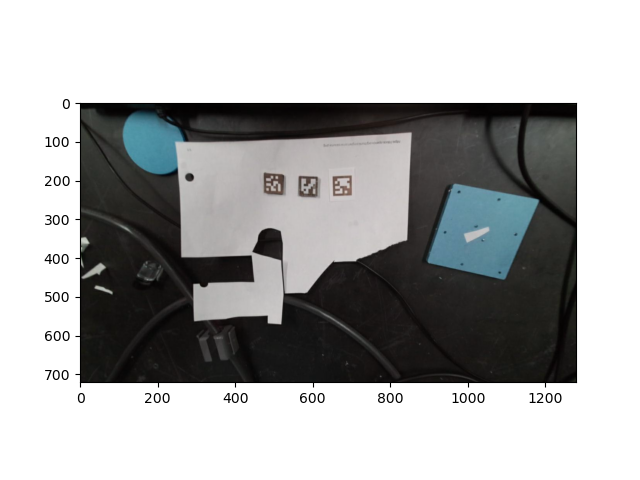

In [228]:
#frame = cv2.imread("./aruco_print.jpg")
frame = cv2.imread("./color.jpg")
plt.figure()
plt.imshow(frame)
plt.show()

Post processing

In [229]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

CPU times: user 21.7 ms, sys: 1.25 ms, total: 23 ms
Wall time: 4.43 ms


Display results

<IPython.core.display.Javascript object>


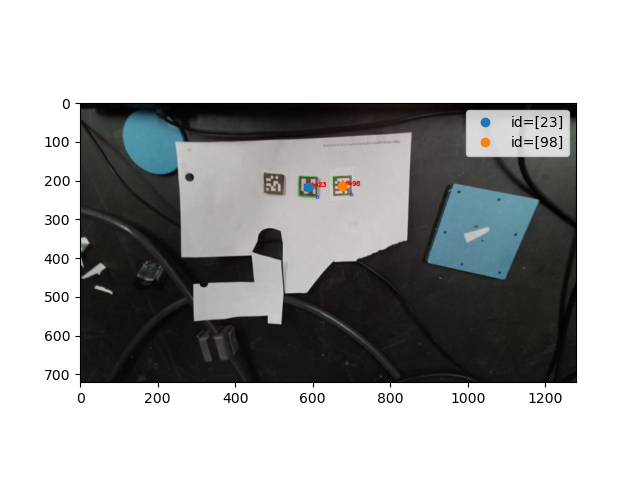

In [230]:
id_centers = {}
if ids is not None:
    plt.figure()
    plt.imshow(frame_markers)
    for i in range(len(ids)):
        c = corners[i][0]
        plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
        id_centers[ids[i][0]] = (c[:, 0].mean(), c[:, 1].mean())
    plt.legend()
    plt.show()


In [231]:
id_centers

{23: (588.25, 216.75), 98: (676.25, 214.5)}

In [233]:
def marker_depth(id_centers, depth_array):
    output = {}
    for key in id_centers:
        center_x = round(id_centers[key][0]) 
        center_y = round(id_centers[key][1])
        output[key] = depth_array[center_y][center_x]*100 #cm
    return output

In [234]:
marker_depth(id_centers, depth_array)

{23: 23.19999933242798, 98: 23.100000619888306}

In [209]:
depth_array[431][495]

0.0

In [6]:
while cv2.waitKey(1) & 0xFF != ord('q'):
    
    color, depth = cam.frames()
    intrinsic = o3d.camera.PinholeCameraIntrinsic(1280, 720, 601.1693115234375, 600.85931396484375, 637.83624267578125, 363.8018798828125)
    depth = o3d.geometry.Image(depth)
    img = o3d.geometry.Image(color)
    rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(img, depth, depth_scale=1.0, convert_rgb_to_intensity=False)
    
    #to array
    color_array = np.asarray(rgbd.color)
    depth_array = np.asarray(rgbd.depth)
    color_img = Image.fromarray(color_array)
    depth_img = Image.fromarray(depth_array)
    color_img.save("color.jpg")
    
    #aruco detection
    frame = cv2.imread("./color.jpg")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
    parameters =  aruco.DetectorParameters_create()
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
    
    #aruco visualization
    id_centers = {}
    if ids is not None:
        #plt.figure()
        #plt.imshow(frame_markers)
        for i in range(len(ids)):
            c = corners[i][0]
            plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
            id_centers[ids[i][0]] = (c[:, 0].mean(), c[:, 1].mean())
        #plt.legend()
        #plt.show()
    print(marker_depth(id_centers, depth_array))

NameError: name 'marker_depth' is not defined